In [2]:
pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 388.9 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 798.9 kB/s eta 0:00:01
   ---------------------------------- ----- 256.0/294.9 kB 1.3 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/294.9 kB 1.3 MB/s eta 0:00:01
   ------------------------------------ - 286.7/294.9 kB 980.4 kB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import librosa
import os
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
import librosa
import numpy as np

# Function to extract audio features for weather detection
def audio_feature_extraction(audio_filename, hop_duration, num_mfcc, num_frames):
    try:
        # Load audio data from file
        samples, sampling_rate = librosa.load(audio_filename, sr=44100)
        
        # Extract MFCC features
        mfcc = librosa.feature.mfcc(
            y=samples, 
            sr=sampling_rate, 
            hop_length=int(sampling_rate * hop_duration), 
            n_mfcc=num_mfcc
        )
        
        # Extract Spectral Centroid
        spectral_centroid = librosa.feature.spectral_centroid(y=samples, sr=sampling_rate)
        
        # Ensure that both sets of features have the same number of frames
        min_frames = min(mfcc.shape[1], spectral_centroid.shape[1], num_frames)
        mfcc = mfcc[:, :min_frames]
        spectral_centroid = spectral_centroid[:, :min_frames]
        
        # Pad or trim the features to have a fixed number of frames
        mfcc_padded = np.pad(mfcc, ((0, 0), (0, num_frames - min_frames)), mode='constant')
        spectral_centroid_padded = np.pad(spectral_centroid, ((0, 0), (0, num_frames - min_frames)), mode='constant')
        
        # Combine MFCC and Spectral Centroid features
        features = np.concatenate((mfcc_padded, spectral_centroid_padded), axis=0)
        
        # Flatten the features to a 1D array
        return features.flatten()
    except IndexError as e:
        print(f"Error occurred while processing file: {audio_filename}. Error: {str(e)}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while processing file: {audio_filename}. Error: {str(e)}")
        return None


In [4]:
# Function to collect audio file paths from a given directory
def collect_audio_files(directory):
    audio_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".wav"):
                audio_files.append(os.path.join(root, file))
    return audio_files

# Parameters for feature extraction and model training
hop_duration = 0.015  # Hop length in seconds
num_mfcc = 16         # Number of MFCC features per frame
num_frames = 200      # Number of frames

# List of weather conditions
weather_conditions = [ 'Earthquake','Rain','Thunder','Windy']

# Path to directory containing weather audio data
path = r'C:\Users\awakw\OneDrive\Desktop\University 23-24\T1_Resurgence\Team Project B\WeatherDetection\WeatherDetection'

# Collect file names and labels for training, validation, and testing sets
training_file_names = []
training_weather_labels = []
validation_file_names = []
validation_weather_labels = []
test_file_names = []
test_weather_labels = []


In [5]:
try:
    for weather_condition in weather_conditions:
        train_path = os.path.join(path, 'Train', weather_condition)
        validate_path = os.path.join(path, 'Validate', weather_condition)
        test_path = os.path.join(path, 'Test', weather_condition)
        
        # Training data
        training_file_names += collect_audio_files(train_path)
        training_weather_labels += [weather_conditions.index(weather_condition)] * len(collect_audio_files(train_path))
        
        # Validation data
        validation_file_names += collect_audio_files(validate_path)
        validation_weather_labels += [weather_conditions.index(weather_condition)] * len(collect_audio_files(validate_path))
        
        # Testing data
        test_file_names += collect_audio_files(test_path)
        test_weather_labels += [weather_conditions.index(weather_condition)] * len(collect_audio_files(test_path))

except Exception as e:
    print("An error occurred while collecting file names and labels:", str(e))


In [6]:
print(training_file_names)
print(training_weather_labels)

['C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\WeatherDetection\\WeatherDetection\\Train\\Earthquake\\filtered_audio_0.wav', 'C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\WeatherDetection\\WeatherDetection\\Train\\Earthquake\\filtered_audio_1.wav', 'C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\WeatherDetection\\WeatherDetection\\Train\\Earthquake\\filtered_audio_10.wav', 'C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\WeatherDetection\\WeatherDetection\\Train\\Earthquake\\filtered_audio_100.wav', 'C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\WeatherDetection\\WeatherDetection\\Train\\Earthquake\\filtered_audio_1000.wav', 'C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\WeatherDetection\\WeatherDetection\\Train\\Earthquake\\filtered_audio_1001.wav', 

In [7]:
print(validation_file_names)
print(validation_weather_labels)

['C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\WeatherDetection\\WeatherDetection\\Validate\\Earthquake\\filtered_audio_2327.wav', 'C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\WeatherDetection\\WeatherDetection\\Validate\\Earthquake\\filtered_audio_2328.wav', 'C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\WeatherDetection\\WeatherDetection\\Validate\\Earthquake\\filtered_audio_2329.wav', 'C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\WeatherDetection\\WeatherDetection\\Validate\\Earthquake\\filtered_audio_2330.wav', 'C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\WeatherDetection\\WeatherDetection\\Validate\\Earthquake\\filtered_audio_2331.wav', 'C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\WeatherDetection\\WeatherDetection\\Validate\\Earthquake\

In [8]:
print(test_file_names)
print(test_weather_labels)

['C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\WeatherDetection\\WeatherDetection\\Test\\Earthquake\\filtered_audio_1916.wav', 'C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\WeatherDetection\\WeatherDetection\\Test\\Earthquake\\filtered_audio_1917.wav', 'C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\WeatherDetection\\WeatherDetection\\Test\\Earthquake\\filtered_audio_1918.wav', 'C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\WeatherDetection\\WeatherDetection\\Test\\Earthquake\\filtered_audio_1919.wav', 'C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\WeatherDetection\\WeatherDetection\\Test\\Earthquake\\filtered_audio_1920.wav', 'C:\\Users\\awakw\\OneDrive\\Desktop\\University 23-24\\T1_Resurgence\\Team Project B\\WeatherDetection\\WeatherDetection\\Test\\Earthquake\\filtered_audio_1921.wav

In [9]:
# Extract audio features for training data
training_features = [audio_feature_extraction(filename, hop_duration, num_mfcc, num_frames) for filename in training_file_names]



In [10]:
# Print the shape of training_features
print("Shape of training_features:", np.array(training_features).shape)

# Print the first few elements of training_features
print("First few elements of training_features:", training_features[:5])


Shape of training_features: (8352, 3400)
First few elements of training_features: [array([-508.60601807, -460.64492798, -457.85043335, ...,  119.47964146,
        102.21633465,  118.69205226]), array([-145.27819824, -209.59393311, -297.33135986, ...,  449.22020158,
        460.82813716,  399.72449449]), array([-137.49827576, -195.68241882, -283.49862671, ...,  386.60071888,
        429.44360349,  410.98103897]), array([-171.17001343, -233.18870544, -275.6027832 , ...,  424.43332312,
        440.78372092,  441.41986114]), array([-291.30395508, -362.5987854 , -416.67941284, ...,  359.26575703,
        400.40396022,  355.18781862])]


In [11]:
# Extract audio features for validation data
validation_features = [audio_feature_extraction(filename, hop_duration, num_mfcc, num_frames) for filename in validation_file_names]



In [12]:
# Print the shape of training_features
print("Shape of validation_features:", np.array(validation_features).shape)

# Print the first few elements of training_features
print("First few elements of validation_features:", validation_features[:5])

Shape of validation_features: (1792, 3400)
First few elements of validation_features: [array([-271.8223877 , -342.20544434, -368.33755493, ...,  324.79669032,
        327.76947807,  364.43538584]), array([-251.97079468, -279.72116089, -284.44250488, ...,  403.12645962,
        397.24349049,  339.06105896]), array([-319.04986572, -314.26419067, -312.87341309, ...,  310.22772648,
        296.09840792,  345.05941895]), array([-232.48336792, -280.06542969, -309.7177124 , ...,  420.9331845 ,
        436.5879386 ,  424.30825593]), array([-102.86180878, -173.05622864, -290.66165161, ...,  495.94839974,
        481.54439288,  444.04107872])]


In [13]:
# Extract audio features for testing data
test_features = [audio_feature_extraction(filename, hop_duration, num_mfcc, num_frames) for filename in test_file_names]



In [14]:
# Print the shape of training_features
print("Shape of test_features:", np.array(test_features).shape)

# Print the first few elements of training_features
print("First few elements of test_features:", test_features[:5])

Shape of test_features: (1790, 3400)
First few elements of test_features: [array([-271.10479736, -281.39877319, -284.04498291, ...,  388.70461597,
        367.48905367,  382.45549687]), array([-103.64329529, -187.77592468, -314.61129761, ...,  365.60707915,
        381.42664681,  480.3001048 ]), array([-274.78619385, -305.69967651, -313.77828979, ...,  258.86318158,
        233.14268135,  284.68857523]), array([-244.61798096, -283.956604  , -289.77029419, ...,  276.29685421,
        275.91144333,  309.95802285]), array([-209.90985107, -264.74588013, -279.77590942, ...,  611.38416387,
        572.51012681,  549.81853056])]


In [15]:
# Train a machine learning model (e.g., SVM)
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1.0)
model.fit(training_features, training_weather_labels)



SVC(kernel='linear')

In [16]:
# Test the model on validation data
predicted_validation_labels = model.predict(validation_features)




In [17]:
# Calculate accuracy on validation set
validation_accuracy = np.sum(predicted_validation_labels == validation_weather_labels) / len(validation_weather_labels)
print('Validation Accuracy:', validation_accuracy)



Validation Accuracy: 0.98828125


In [18]:
# Test the model on testing data
predicted_test_labels = model.predict(test_features)



In [19]:
# Calculate accuracy on testing set
test_accuracy = np.sum(predicted_test_labels == test_weather_labels) / len(test_weather_labels)
print('Testing Accuracy:', test_accuracy)


Testing Accuracy: 0.9837988826815642


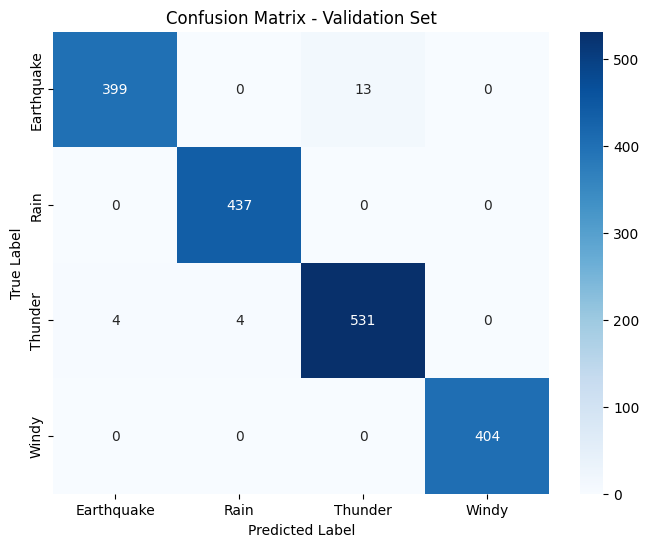

In [20]:
# Plot confusion matrix for validation set
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix_validation = confusion_matrix(validation_weather_labels, predicted_validation_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_validation, annot=True, fmt='d', cmap='Blues', xticklabels=weather_conditions, yticklabels=weather_conditions)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Validation Set')
plt.show()


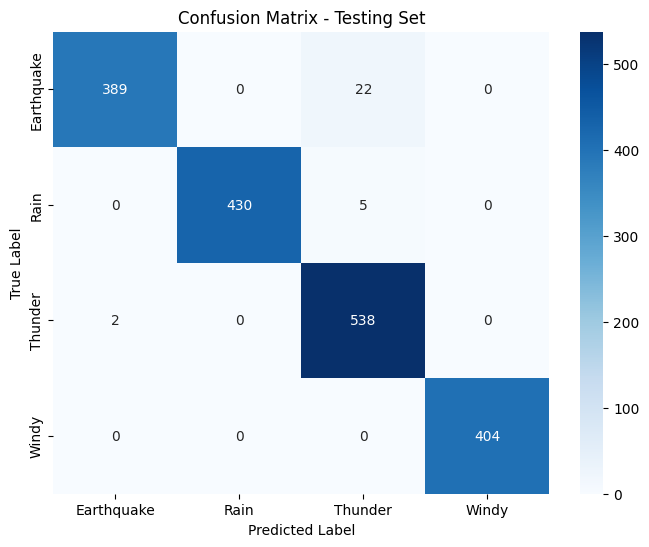

: 

In [21]:
# Plot confusion matrix for validation set
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot confusion matrix for testing set
conf_matrix_test = confusion_matrix(test_weather_labels, predicted_test_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=weather_conditions, yticklabels=weather_conditions)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Testing Set')
plt.show()